['C:\\Users\\Darsh\\Projects\\ETL_Week1\\raw_data\\cleaned_df.csv', 'C:\\Users\\Darsh\\Projects\\ETL_Week1\\raw_data\\clean_sales_20251028_191601.csv', 'C:\\Users\\Darsh\\Projects\\ETL_Week1\\raw_data\\clean_sales_20251028_192109.csv', 'C:\\Users\\Darsh\\Projects\\ETL_Week1\\raw_data\\sales_feb.csv', 'C:\\Users\\Darsh\\Projects\\ETL_Week1\\raw_data\\sales_jan.csv', 'C:\\Users\\Darsh\\Projects\\ETL_Week1\\raw_data\\sales_mar.csv']
          Date Product     Category   Sales   Cost  Profit
0   05-02-2024   Shirt     Clothing   450.0  280.0   170.0
1   07-02-2024     Bag  Accessories  1200.0  850.0   350.0
2   01-01-2024   Shirt     Clothing   500.0  300.0   200.0
3   02-01-2024    Pant     Clothing   600.0  200.0   400.0
4   03-01-2024   Shoes     Footwear   800.0  550.0   250.0
..         ...     ...          ...     ...    ...     ...
1   02-01-2024    Pant     Clothing   600.0  200.0     NaN
2   03-01-2024   Shoes     Footwear   800.0  550.0     NaN
3          NaN     NaN          NaN

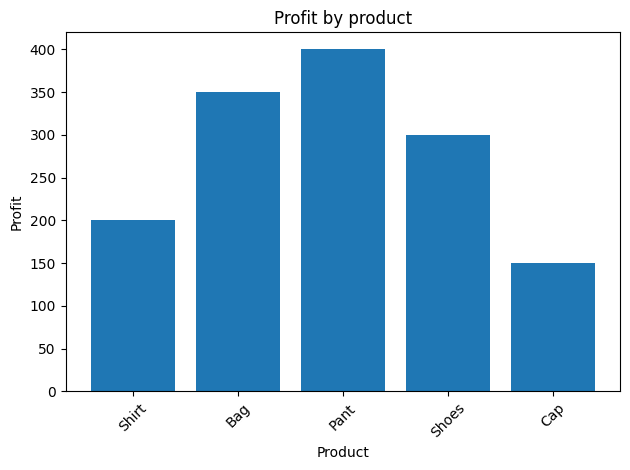


 Cleaned data saved sucessfully at: C:\Users\Darsh\Projects\ETL_Week1\raw_data\clean_sales_20251028_192604.csv


In [8]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from datetime import datetime

folder=r"C:\Users\Darsh\Projects\ETL_Week1\raw_data"

files=glob.glob(os.path.join(folder,"*.csv"))
print(files)

dataframes=[]
for file in files:
    df=pd.read_csv(file)
    if 'Sales' in df.columns and 'Cost' in df.columns:
        dataframes.append(df)
    else:
        print(f"Skipped{file}:Missing required column")
    

final_df=pd.concat(dataframes)
print(final_df)
print(final_df.head())

final_df["Profit"]=final_df["Sales"]-final_df["Cost"]


timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_path = os.path.join(folder, f"clean_sales_{timestamp}.csv")

final_df.to_csv(output_path,index=False)


final_df["Product"] = final_df["Product"].astype(str)
final_df = final_df.dropna(subset=["Profit"])
plt.bar(final_df["Product"],final_df["Profit"])
plt.title("Profit by product")
plt.xlabel("Product")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
           
print(f"\n Cleaned data saved sucessfully at: {output_path}")
